In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import lightgbm

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score


In [2]:
# set options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 데이터 확인 및 전처리

In [3]:
vote_df = pd.read_csv("C:\\Users\\eunseo\\Desktop\\Git\\AI-project\\data\\train.csv", encoding="utf-8")
print("dataset shape: ", vote_df.shape)
vote_df.sample(10)

dataset shape:  (36425, 78)


,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
31647,28830,2.0,511,1.0,1825,3.0,1285,2.0,1241,5.0,3137,2.0,1687,2.0,1281,1.0,3567,4.0,3721,4.0,2231,5.0,1815,4.0,2750,2.0,1468,2.0,1031,1.0,840,1.0,3304,5.0,352,5.0,1214,1.0,809,3.0,1274,10s,2,2,1,Female,1,2,Asian,Sikh,1,5,0,2,0,6,0,2,1,5,3,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1
33510,44304,1.0,2185,1.0,3745,5.0,1859,1.0,1013,3.0,3975,1.0,1306,4.0,2454,4.0,2497,1.0,2626,5.0,1949,4.0,2885,5.0,1861,2.0,3735,1.0,1019,4.0,3245,5.0,3107,3.0,2573,3.0,1821,4.0,1347,5.0,2097,+70s,2,2,4,Male,1,2,White,Agnostic,3,5,2,5,2,1,1,5,2,3,1,0,0,0,0,0,1,0,1,1,0,1,1,1,1,0,1,1
26408,6052,1.0,1310,1.0,1797,4.0,2943,1.0,1387,1.0,1591,1.0,1048,1.0,4579,1.0,2120,3.0,4149,2.0,2783,5.0,1907,5.0,1700,4.0,1362,4.0,1723,3.0,4408,2.0,2303,4.0,2658,5.0,1685,1.0,2308,1.0,1814,50s,3,1,2,Male,1,2,White,Agnostic,4,2,5,6,0,2,0,2,0,6,3,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,1,1
36409,28757,1.0,939,1.0,1041,3.0,1115,4.0,1706,3.0,1096,4.0,1253,5.0,815,1.0,959,4.0,4361,3.0,1728,5.0,1385,3.0,1727,2.0,2207,4.0,2357,2.0,1895,3.0,1150,3.0,479,5.0,1118,3.0,1097,2.0,2452,30s,3,2,2,Male,1,2,White,Other,3,5,1,5,1,2,0,5,0,2,1,1,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1
34404,14032,1.0,1141,1.0,4753,5.0,1067,1.0,1633,2.0,4592,2.0,4101,1.0,1508,5.0,2124,1.0,3116,1.0,3076,5.0,2971,5.0,1576,1.0,1883,2.0,2469,4.0,3408,5.0,1447,2.0,1599,2.0,2510,4.0,2754,5.0,1825,40s,4,2,9,Male,1,2,White,Muslim,1,1,1,1,0,3,2,6,4,6,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1
22577,31619,3.0,364,3.0,223,3.0,1093,2.0,109,2.0,988,3.0,728,2.0,873,2.0,2166,3.0,1692,4.0,2879,5.0,1326,4.0,852,3.0,2652,3.0,371,2.0,807,4.0,864,4.0,964,3.0,893,3.0,893,4.0,869,20s,2,1,1,Female,1,1,White,Christian_Other,1,2,1,1,2,4,0,3,2,5,2,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,1,1
21426,5156,3.0,641,1.0,1927,4.0,894,3.0,727,2.0,2381,2.0,927,4.0,1094,4.0,2447,4.0,3395,3.0,1990,5.0,978,3.0,1810,2.0,1064,4.0,533,3.0,1050,3.0,1502,4.0,541,2.0,1431,2.0,969,4.0,1373,50s,3,1,3,Male,1,2,White,Atheist,2,3,2,5,1,3,1,3,1,5,3,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
19956,20676,1.0,586,5.0,141,5.0,394,1.0,654,1.0,1186,1.0,859,2.0,932,3.0,412,5.0,8252,5.0,588,2.0,1378,3.0,1650,5.0,690,1.0,298,2.0,1358,5.0,434,1.0,791,1.0,549,4.0,570,5.0,410,20s,3,2,3,Male,1,1,Asian,Christian_Catholic,2,5,2,0,0,0,0,1,4,6,3,1,0,1,0,1,1,0,1,1,1,1,1,0,1,0,1,1
8704,31324,2.0,459,1.0,682,4.0,676,2.0,649,2.0,591,1.0,988,2.0,505,1.0,1096,3.0,1077,4.0,148,5.0,1028,5.0,632,4.0,495,1.0,394,2.0,969,2.0,590,1.0,371,3.0,1272,4.0,1545,2.0,1761,20s,4,1,3,Male,1,1,White,Agnostic,4,2,2,6,2,1,2,2,0,2,2,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1
7353,15779,2.0,797,4.0,1709,5.0,1348,1.0,965,2.0,1033,2.0,806,2.0,1137,4.0,1359,2.0,1607,5.0,1023,4.0,1191,5.0,1039,4.0,1187,1.0,1053,4.0,995,4.0,753,2.0,1028,4.0,1359,4.0,725,4.0,1257,40s,0,1,4,Female,1,2,White,Agnostic,6,1,2,4,1,1,1,4,6,5,2,1,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1


In [4]:
# vote_df.info()

In [5]:
# vote_df.describe()

In [6]:
# 불균형 분포인지 확인
print(vote_df['voted'].value_counts())
unsatisfied_cnt = vote_df[vote_df['voted'] == 1].voted.count()
total_cnt = vote_df.voted.count()
print("unsatisfied 비율은 {0:.2f}".format(unsatisfied_cnt / total_cnt))

0    19918
1    16507
Name: voted, dtype: int64
unsatisfied 비율은 0.45


선거 투표 여부
- 0 = No
- 1 = Yes

In [7]:
# NA값 확인
# print(vote_df.isna().sum())

In [8]:
# 예측한 값으로 성능을 평가하는 함수
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred) # 오차 행렬
    accuracy = accuracy_score(y_test, pred) # 정확도
    precision = precision_score(y_test, pred) # 정밀도
    recall = recall_score(y_test, pred) # 재현율
    f1 = f1_score(y_test, pred) # F1
    roc_auc = roc_auc_score(y_test, pred_proba) # ROC-AUC
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

### 결손값 처리

In [9]:
# 인덱스 제거
vote_df.drop("index", axis=1, inplace=True)

In [10]:

# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['education', 'engnat', 'hand', 'urban']
for i in range(97, 117):  # 질문을 답할 때까지의 시간
    s = 'Q' + chr(i) + 'E'
    zero_features.append(s)

# 전체 데이터 건수
total_count = vote_df['education'].count()
print("전체 데이터 건수는 ", total_count)
print()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수 추출하고 퍼센트 계산
for feature in zero_features:
    zero_count = vote_df[vote_df[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))
print()
    
# tp 범위 검사
tp_features = []
for i in range(1, 11):
    s = 'tp' + chr(48+(i//10)) + chr(48+(i%10))
    tp_features.append(s)
    
# 피처별로 반복하면서 데이터 값이 01~07을 벗어난 데이터 건수 추출하고 퍼센트 계산
for feature in tp_features:
    cnt = vote_df[vote_df[feature] < 1][feature].count() + vote_df[vote_df[feature] > 7][feature].count()
    print('{0} 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, cnt, 100*cnt/total_count))
print()

print("value > 7\tvalue == 7\tvalue < 0")
for feature in tp_features:
    cnt1 = vote_df[vote_df[feature] > 7][feature].count()
    cnt2 = vote_df[vote_df[feature] == 0][feature].count() # tp__ 데이터 결손값이 모두 0임을 확인
    cnt3 = vote_df[vote_df[feature] < 0][feature].count()
    print("%d\t\t%d\t\t%d" % (cnt1, cnt2, cnt3))
    
zero_features = zero_features + tp_features

# zero_features 리스트 내부에 저장된 개별 피처들에 대해 0값을 평균 값으로 대체
vote_df[zero_features] = vote_df[zero_features].replace(0, vote_df[zero_features].mean())


전체 데이터 건수는  36425

education 0 건수는 432, 퍼센트는 1.19 %
engnat 0 건수는 63, 퍼센트는 0.17 %
hand 0 건수는 135, 퍼센트는 0.37 %
urban 0 건수는 258, 퍼센트는 0.71 %
QaE 0 건수는 0, 퍼센트는 0.00 %
QbE 0 건수는 0, 퍼센트는 0.00 %
QcE 0 건수는 0, 퍼센트는 0.00 %
QdE 0 건수는 0, 퍼센트는 0.00 %
QeE 0 건수는 0, 퍼센트는 0.00 %
QfE 0 건수는 0, 퍼센트는 0.00 %
QgE 0 건수는 0, 퍼센트는 0.00 %
QhE 0 건수는 1, 퍼센트는 0.00 %
QiE 0 건수는 1, 퍼센트는 0.00 %
QjE 0 건수는 1, 퍼센트는 0.00 %
QkE 0 건수는 2, 퍼센트는 0.01 %
QlE 0 건수는 0, 퍼센트는 0.00 %
QmE 0 건수는 0, 퍼센트는 0.00 %
QnE 0 건수는 0, 퍼센트는 0.00 %
QoE 0 건수는 0, 퍼센트는 0.00 %
QpE 0 건수는 1, 퍼센트는 0.00 %
QqE 0 건수는 1, 퍼센트는 0.00 %
QrE 0 건수는 0, 퍼센트는 0.00 %
QsE 0 건수는 0, 퍼센트는 0.00 %
QtE 0 건수는 0, 퍼센트는 0.00 %

tp01 건수는 3822, 퍼센트는 10.49 %
tp02 건수는 4356, 퍼센트는 11.96 %
tp03 건수는 9348, 퍼센트는 25.66 %
tp04 건수는 4414, 퍼센트는 12.12 %
tp05 건수는 12682, 퍼센트는 34.82 %
tp06 건수는 7148, 퍼센트는 19.62 %
tp07 건수는 7858, 퍼센트는 21.57 %
tp08 건수는 2547, 퍼센트는 6.99 %
tp09 건수는 7027, 퍼센트는 19.29 %
tp10 건수는 1158, 퍼센트는 3.18 %

value > 7	value == 7	value < 0
0		3822		0
0		4356		0
0		9348		0
0		4414		0
0		126

### 이상값 처리

<AxesSubplot:>

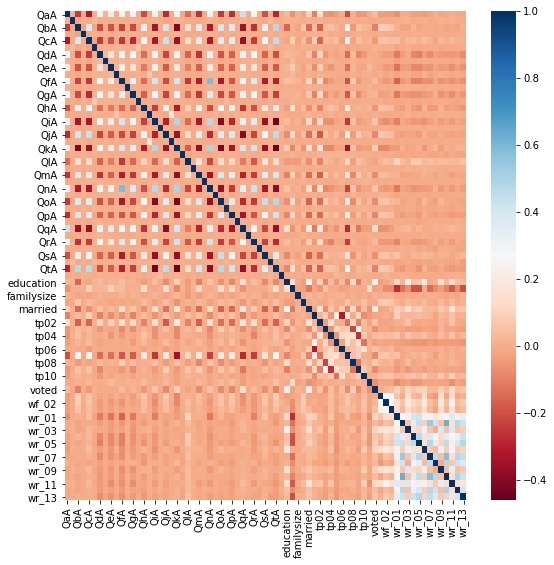

In [11]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = vote_df.corr()
sns.heatmap(corr, cmap="RdBu")

In [13]:
def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함
    fraud = df[df["voted"]==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값보다 크거나, 최소값보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [14]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy[""])

In [15]:

# #Q_E 시간
# Q_E = []
# for i in range(97, 117):
#     a = 'Q' + chr(i) + 'E'
#     Q_E.append(a)

# #시간에 대해 이상치 데이터 인덱스 확인 및 제거
# for feature in Q_E:
#     outlier_index = get_outlier(df=vote_df, column=feature, weight=1.5)
#     print('이상치 데이터 인덱스 :', outlier_index)
#     print("이상치 데이터 인덱스 개수:", len(outlier_index))
#     vote_df.drop(outlier_index, axis=0, inplace=True)


이상치 데이터 인덱스 : Int64Index([   21,    31,    77,   110,   124,   134,   214,   243,   253,
              267,
            ...
            36149, 36179, 36205, 36206, 36220, 36221, 36252, 36350, 36363,
            36373],
           dtype='int64', length=1193)
이상치 데이터 인덱스 개수: 1193
이상치 데이터 인덱스 : Int64Index([   43,    90,   143,   182,   190,   199,   250,   263,   302,
              312,
            ...
            36204, 36254, 36267, 36274, 36306, 36320, 36322, 36336, 36364,
            36387],
           dtype='int64', length=1171)
이상치 데이터 인덱스 개수: 1171
이상치 데이터 인덱스 : Int64Index([   35,    49,    94,    96,   101,   111,   114,   131,   171,
              270,
            ...
            36237, 36280, 36290, 36295, 36304, 36315, 36325, 36358, 36365,
            36375],
           dtype='int64', length=1068)
이상치 데이터 인덱스 개수: 1068
이상치 데이터 인덱스 : Int64Index([    9,    27,    33,    66,   258,   266,   274,   394,   400,
              422,
            ...
            35965, 36184, 36224, 36235,

### 데이터 변환

In [16]:
# 선형 회귀와 같은 ML 알고리즘에는 적용하지 않아야 함 (트리 계열의 ML알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 괜찮음)
# 레이블 인코딩 적용 : age_group
encoder = LabelEncoder()
encoder.fit(vote_df['age_group'])
labels = encoder.transform(vote_df['age_group'])
vote_df['age_group'] = labels
print("인코딩 변환값:", labels)
print("인코딩 클래스:", encoder.classes_)
print("디코딩 원본값:", encoder.inverse_transform([1,2,3,4,5]))

인코딩 변환값: [2 1 1 ... 3 1 4]
인코딩 클래스: ['+70s' '10s' '20s' '30s' '40s' '50s' '60s']
디코딩 원본값: ['10s' '20s' '30s' '40s' '50s']


In [17]:
def get_categoty_age(age_num):
    num = age_num;
    if age_num == 0: num =7
    return num
vote_df["age_group"] = vote_df["age_group"].apply(lambda x : get_categoty_age(x))

In [18]:
# 원-핫 인코딩 적용 : gender, race, religion
# vote_df = pd.get_dummies(data = vote_df, columns = ["gender"], prefix="gender")
# vote_df = pd.get_dummies(data = vote_df, columns = ["race"], prefix="race")
# vote_df = pd.get_dummies(data = vote_df, columns = ["religion"], prefix="religion")


In [19]:
#원핫인코딩 진행
# def dummy_data(data, columns) :
#     for column in columns:
#         data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
#         data = data.drop(column, axis=1)
#         vote_df = pd.get_dummies(data = vote_df, columns = ["gender"], prefix="gender")
#     return data

dummy_columns = ['engnat', 'gender','hand', 'married', 'race', 'religion', 'urban']
for column in dummy_columns:
    vote_df = pd.get_dummies(data = vote_df, columns = [column], prefix=column)


# 모델 학습

In [20]:
y_labels = vote_df.loc[:,'voted']
X_features = vote_df.drop('voted', axis=1)
print("피처 데이터 shape:{0}".format(X_features.shape))
type(X_features)

피처 데이터 shape:(24623, 105)


pandas.core.frame.DataFrame

In [21]:
# standard scaler 적용
from sklearn.preprocessing import StandardScaler

print("이전 feature들의 평균 값")
print(X_features.mean())
print("\n이전 feature들의 분산 값")
print(X_features.var())

scaler = StandardScaler()
vote_scaled = scaler.fit_transform(X_features)

X_features = pd.DataFrame(data=vote_scaled, columns=X_features.columns.values.tolist())
print("이후 feature들의 평균 값")
print(X_features.mean())
print("\n이후 feature들의 분산 값")
print(X_features.var())

이전 feature들의 평균 값
QaA                                 2.108435
QaE                               870.234537
QbA                                 3.025220
QbE                              1915.478780
QcA                                 3.717906
QcE                              1269.253868
QdA                                 1.739228
QdE                              1382.546359
QeA                                 2.299029
QeE                              1786.337083
QfA                                 2.115745
QfE                              2164.228973
QgA                                 2.515291
QgE                              1198.769118
QhA                                 2.370101
QhE                              2026.412582
QiA                                 3.082971
QiE                              3541.349429
QjA                                 3.653210
QjE                              2246.198844
QkA                                 3.717134
QkE                              1778

QaA                              3.461021e-17
QaE                             -4.311622e-19
QbA                             -1.808063e-16
QbE                              3.346157e-18
QcA                             -6.676398e-16
QcE                              3.137734e-17
QdA                              3.659682e-16
QdE                              4.499868e-18
QeA                             -1.351043e-16
QeE                             -2.074088e-19
QfA                              4.547212e-16
QfE                             -9.009459e-18
QgA                              2.201869e-15
QgE                             -1.402714e-17
QhA                             -2.956792e-16
QhE                             -2.142285e-18
QiA                              2.500177e-16
QiE                              1.358372e-17
QjA                             -1.204053e-16
QjE                              6.766429e-18
QkA                              3.087009e-16
QkE                             -5

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=156)
train_cnt = y_train.count()
test_cnt = y_test.count()
print("학습 세트 Shape:{0}, 테스트 세트 Shape:{1}".format(X_train.shape, X_test.shape))

print(" 학습 세트 레이블 값 분포 비율")
print(y_train.value_counts()/train_cnt)
print("\n 테스트 세트 레이블 값 분포 비율")
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(19698, 105), 테스트 세트 Shape:(4925, 105)
 학습 세트 레이블 값 분포 비율
0    0.810235
1    0.189765
Name: voted, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.803655
1    0.196345
Name: voted, dtype: float64


In [23]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics
def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=100):
   
    # get new n_estimator
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          metrics='error', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
        print(alg)
    
    # Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['voted'], eval_metric='error')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Training Accuracy : %.4g" % metrics.accuracy_score(dtrain['voted'].values, dtrain_predictions))
    
target = "voted"
predictors = [x for x in X_train.columns if x not in [target]]
xgb1 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=-1,
    scale_pos_weight=1,
    seed=2019
)
modelfit(xgb1, vote_df, predictors)

XGBClassifier(colsample_bytree=0.8, max_depth=5, n_estimators=155, nthread=-1,
              seed=2019, subsample=0.8)

Model Report
Training Accuracy : 0.8906


In [27]:
param_test1 = {
 'max_depth':range(3,10,3),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1, 
                                                  n_estimators=1000, 
                                                  max_depth=5, 
                                                  min_child_weight=1, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', 
                                                  nthread=-1, 
                                                  scale_pos_weight=1, seed=2019),
param_grid = param_test1, scoring='accuracy',n_jobs=-1,iid=False, cv=5, verbose=10)
gsearch1.fit(X_train, y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done  43 out of  45 | elapsed: 24.0min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 25.1min finished
C:\Users\eunseo\anaconda3\envs\ssu\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([ 62.31824551,  70.28605146,  68.93897209, 140.95274463,
         138.51350193, 135.71732626, 184.20225501, 180.8386939 ,
         169.79838371]),
  'std_fit_time': array([ 5.26583967,  2.22892723,  1.38707932,  4.06006303,  6.29703971,
          6.65468138,  4.07542639,  4.61442939, 15.13183896]),
  'mean_score_time': array([0.18379703, 0.21160216, 0.22658768, 0.4820034 , 0.54806571,
         0.50043144, 0.83652806, 0.61620264, 0.55268755]),
  'std_score_time': array([0.00868177, 0.01753037, 0.03027497, 0.04373975, 0.1107889 ,
         0.0202582 , 0.07582023, 0.02746425, 0.1815397 ]),
  'param_max_depth': masked_array(data=[3, 3, 3, 6, 6, 6, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5],
               mask=[False, False, False, False, False, False, False, False,
  

In [28]:
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  n_estimators=1000, 
                                                  max_depth=3,
                                                  min_child_weight=3, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', 
                                                  thread=-1, 
                                                  scale_pos_weight=1,
                                                  seed=2019), 
                        param_grid = param_test2, scoring='accuracy', n_jobs=-1, iid=False, cv=5)
gsearch2.fit(X_train, y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

C:\Users\eunseo\anaconda3\envs\ssu\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([60.74703979, 66.8098896 , 65.67450585, 65.54506664, 61.67569699]),
  'std_fit_time': array([ 5.69943649,  6.32033754,  5.38618743,  2.32106023, 11.69072287]),
  'mean_score_time': array([0.19378777, 0.20305977, 0.24062939, 0.20033064, 0.21936779]),
  'std_score_time': array([0.01257076, 0.01509956, 0.04375321, 0.03275987, 0.05152492]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.85736041, 0.8571066 , 0.85659898, 0.86294416, 0.85913706]),
  'split1_test_score': array([0.85989848, 0.85812183, 0.85812183, 0.85609137, 0.85964467]),
  'split2_test_score': array([0.85685279, 0.85761421, 0.85431472, 0.85507614, 0.85583756]),
  'split3_test_score': array([0.86290937, 0.85910129, 0.86189388, 0.86316324, 0.8

In [29]:
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  n_estimators=1000, 
                                                  max_depth=3,
                                                  min_child_weight=5, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', 
                                                  thread=-1, 
                                                  scale_pos_weight=1,
                                                  seed=2019), 
                        param_grid = param_test3, scoring='accuracy', n_jobs=-1, iid=False, cv=5, verbose=10)
gsearch3.fit(X_train, y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 21.7min finished
C:\Users\eunseo\anaconda3\envs\ssu\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([48.89998069, 52.06037998, 49.65795617, 47.3791101 , 66.4949996 ,
         63.62442818, 58.47513633, 62.70262575, 73.16299472, 70.52279716,
         67.42738762, 66.28239074, 80.60260062, 81.19039888, 77.13570113,
         71.97746763]),
  'std_fit_time': array([0.97204594, 3.82982776, 4.08753274, 1.45246241, 2.16031217,
         4.18089114, 6.33534294, 5.86614165, 1.1496791 , 2.81180977,
         2.91808042, 0.4256512 , 0.75140362, 2.75593384, 2.63161462,
         0.36430828]),
  'mean_score_time': array([0.19840274, 0.20414362, 0.19375029, 0.21875038, 0.20578637,
         0.20767455, 0.19019537, 0.24140105, 0.21580043, 0.24480004,
         0.24140215, 0.21020255, 0.25219941, 0.25000472, 0.22502117,
         0.20328746]),
  'std_score_time': array([0.02180107, 0.02070598, 0.00765296, 0.01711942, 0.01614672,
         0.01150893, 0.00649506, 0.03300888, 0.01535417, 0.00549169,
         0.03234516, 0.0559146 , 0.0241763 , 0.0616894 , 0.04379536,
         0.036190

In [31]:
param_test5 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  n_estimators=1000, 
                                                  max_depth=3,
                                                  min_child_weight=5, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.6,
                                                  objective= 'binary:logistic', 
                                                  thread=-1, 
                                                  scale_pos_weight=1,
                                                  seed=2019), 
                        param_grid = param_test5, scoring='accuracy', n_jobs=-1, iid=False, cv=5, verbose=10)
gsearch5.fit(X_train, y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:  5.4min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.7min finished
C:\Users\eunseo\anaconda3\envs\ssu\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([47.1039412 , 59.8992691 , 65.25230827, 61.75683961, 30.38687806]),
  'std_fit_time': array([2.51263022, 8.42024372, 4.06326665, 0.21459031, 6.12602342]),
  'mean_score_time': array([0.20622773, 0.21765957, 0.19911094, 0.22833819, 0.08295383]),
  'std_score_time': array([0.06371954, 0.01816536, 0.01535768, 0.02078741, 0.02461862]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([0.85685279, 0.85964467, 0.85456853, 0.85837563, 0.83375635]),
  'split1_test_score': array([0.86040609, 0.85634518, 0.85812183, 0.8571066 , 0.8357868 ]),
  'split2_test_score': array([0.85812183, 0.85634518, 0.85736041, 0.85279188, 0.83375635]),
  'split3_test_score': array([0.85859355, 0.85783194, 0.8596

In [32]:
param_test4 = {
 'subsample':[i/100.0 for i in range(40,80)],
}
gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  n_estimators=1000, 
                                                  max_depth=3,
                                                  min_child_weight=5, 
                                                  gamma=0, 
                                                  reg_alpha=1e-05,
                                                  subsample=0.8, 
                                                  colsample_bytree=0.6,
                                                  objective= 'binary:logistic', 
                                                  thread=-1, 
                                                  scale_pos_weight=1,
                                                  seed=2019), 
                        param_grid = param_test4, scoring='accuracy', n_jobs=-1, iid=False, cv=5, verbose=10)
gsearch4.fit(X_train, y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 41

({'mean_fit_time': array([46.98854084, 52.65941067, 55.66686368, 55.62327852, 56.50289497,
         52.00775046, 56.86177225, 51.48644872, 60.66462336, 52.53352175,
         59.82273483, 52.62161708, 58.85848918, 57.85100594, 58.62295289,
         54.84558296, 57.08128452, 58.45242648, 58.6655035 , 56.43758173,
         55.59297833, 60.33159285, 54.94559822, 61.27449198, 53.70140896,
         59.60584497, 53.79074826, 60.83767953, 51.14363146, 59.14851313,
         52.92163529, 60.62440858, 50.5686316 , 57.54878631, 54.03450284,
         57.01088629, 54.47567363, 54.62476883, 54.93047605, 51.43554206]),
  'std_fit_time': array([0.73466244, 4.39917294, 2.26736631, 0.74514823, 3.80072377,
         3.40485362, 0.24192687, 2.56491595, 3.91356448, 0.33489296,
         5.2299969 , 5.72615641, 2.13698506, 5.50504634, 5.88968775,
         4.46726384, 3.45653106, 6.08397751, 6.14312498, 3.88546958,
         5.61544657, 7.77194574, 3.66780796, 1.49458134, 5.64548927,
         6.77788155, 2.55230

In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# xgb_model = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, random_state=156)

# params = {"max_depth":[3, 5, 7], "min_child_weight":[1, 3], "colsample_bytree":[0.5, 0.75], }
# gridcv = GridSearchCV(xgb_model, param_grid=params, cv=3)

evals = [(X_test, y_test)]
# gridcv.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
# print(gridcv.best_params_)

xgb_model = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, objective="binary:logistic", min_child_weight=3, colsample_bytree=0.5, random_state=156)
xgb_model.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
w_preds = xgb_model.predict(X_test)
w_pred_proba = xgb_model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, w_preds, w_pred_proba)

[0]	validation_0-logloss:0.647286
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.608644
[2]	validation_0-logloss:0.576979
[3]	validation_0-logloss:0.550423
[4]	validation_0-logloss:0.529627
[5]	validation_0-logloss:0.50909
[6]	validation_0-logloss:0.491714
[7]	validation_0-logloss:0.476853
[8]	validation_0-logloss:0.465514
[9]	validation_0-logloss:0.454923
[10]	validation_0-logloss:0.443764
[11]	validation_0-logloss:0.434458
[12]	validation_0-logloss:0.425891
[13]	validation_0-logloss:0.418425
[14]	validation_0-logloss:0.411568
[15]	validation_0-logloss:0.405929
[16]	validation_0-logloss:0.399773
[17]	validation_0-logloss:0.394069
[18]	validation_0-logloss:0.38933
[19]	validation_0-logloss:0.384864
[20]	validation_0-logloss:0.380454
[21]	validation_0-logloss:0.376621
[22]	validation_0-logloss:0.37303
[23]	validation_0-logloss:0.369514
[24]	validation_0-logloss:0.366158
[25]	validation_0-logloss:0.363075
[26]	validation_0-logloss:0.360261

[230]	validation_0-logloss:0.252697
[231]	validation_0-logloss:0.252663
[232]	validation_0-logloss:0.252595
[233]	validation_0-logloss:0.252519
[234]	validation_0-logloss:0.252502
[235]	validation_0-logloss:0.252419
[236]	validation_0-logloss:0.252313
[237]	validation_0-logloss:0.252234
[238]	validation_0-logloss:0.252225
[239]	validation_0-logloss:0.252162
[240]	validation_0-logloss:0.25213
[241]	validation_0-logloss:0.252146
[242]	validation_0-logloss:0.252074
[243]	validation_0-logloss:0.252124
[244]	validation_0-logloss:0.252113
[245]	validation_0-logloss:0.252055
[246]	validation_0-logloss:0.251995
[247]	validation_0-logloss:0.251969
[248]	validation_0-logloss:0.251905
[249]	validation_0-logloss:0.251893
[250]	validation_0-logloss:0.251854
[251]	validation_0-logloss:0.251888
[252]	validation_0-logloss:0.251903
[253]	validation_0-logloss:0.251865
[254]	validation_0-logloss:0.251815
[255]	validation_0-logloss:0.251773
[256]	validation_0-logloss:0.251774
[257]	validation_0-logloss:0.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

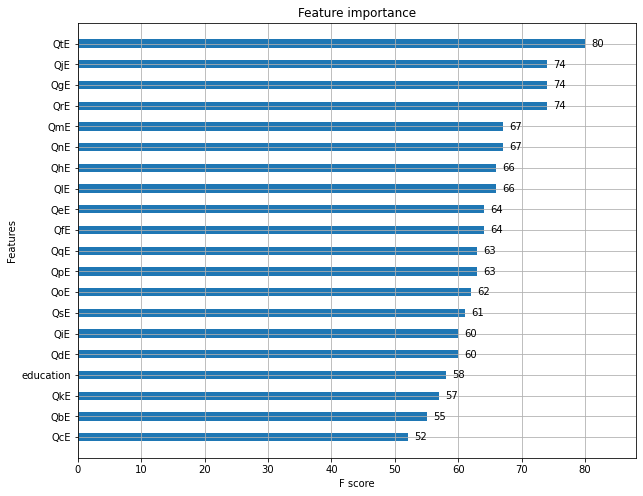

In [25]:
from xgboost import plot_importance
fig, ax = plt.subplots(1,1, figsize=(10,8))
plot_importance(xgb_model, ax=ax, max_num_features=20, height=0.4)